<a href="https://colab.research.google.com/github/Tamripo/prediccion_ventas/blob/main/Prediccion_ventas_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Bootcamp - Data Science/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Valores duplicados y validación de categorías

In [4]:
df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [5]:
df['Item_Identifier'].value_counts().head(10)

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
Name: Item_Identifier, dtype: int64

In [6]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [8]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [9]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [10]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [11]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [12]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [14]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Valores Faltates

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
df[df['Item_Weight'].isna()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [17]:
vac = df['Item_Identifier'][df['Item_Weight'].isna()].value_counts()
vac.index

Index(['FDK08', 'FDA08', 'FDV23', 'FDY56', 'FDI04', 'FDZ33', 'FDK27', 'FDU21',
       'NCW29', 'DRI11',
       ...
       'FDK03', 'FDZ44', 'NCB06', 'FDP45', 'FDU27', 'FDM44', 'FDZ48', 'FDK41',
       'FDD57', 'NCN18'],
      dtype='object', length=1142)

In [18]:
df['Item_Weight'][df['Item_Identifier']=='FDP10'].mean()

19.0

In [19]:
x = df['Item_Weight'][df['Item_Identifier']=='FDP10'].mean()
x

19.0

In [20]:
df.loc[df['Item_Identifier']=='FDP10','Item_Weight']= df.loc[df['Item_Identifier']=='FDP10','Item_Weight'].fillna(x)

In [21]:
df.loc[df['Item_Identifier']=='FDP10','Item_Weight']

7       19.0
585     19.0
2623    19.0
3382    19.0
4585    19.0
6087    19.0
7883    19.0
Name: Item_Weight, dtype: float64

In [22]:
df[df['Item_Weight'].isna()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916


Al revisar la información por ID producto podemos ver que el Peso del producto se repite por lo cual se le asignará a los datos faltantes el promedio del peso por ID_producto respectivo.

In [23]:
for val in vac.index:
  #print(val)
  a = df['Item_Weight'][df['Item_Identifier']==val].mean()
  #print(a)
  df.loc[df['Item_Identifier']==val,'Item_Weight'] = df.loc[df['Item_Identifier']==val,'Item_Weight'].fillna(a)

In [24]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [25]:
df.loc[df['Item_Identifier']=='FDW13','Item_Weight']

256     8.5
1141    8.5
2190    8.5
3928    8.5
3978    8.5
6499    8.5
6587    8.5
7029    8.5
8025    8.5
8032    8.5
Name: Item_Weight, dtype: float64

In [26]:
df.loc[df['Item_Identifier']=='FDN52','Item_Weight']

927   NaN
Name: Item_Weight, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Al tener 4 datos de peso faltantes, no tener una fuente de donde completarlos y estos representan aproximadamente el 0.05% de los datos totales, se procederá a eliminarlos ya que no generarán mayor impacto.

In [28]:
df[df['Outlet_Identifier']=='OUT017'].head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704
54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,NaN,Tier 2,Supermarket Type1,4815.0656
73,FDG02,7.855,Low Fat,0.011325,Canned,189.6188,OUT017,2007,NaN,Tier 2,Supermarket Type1,2285.0256


In [29]:
f1= df['Outlet_Location_Type']=='Tier 2'
f2= df['Outlet_Type']=='Supermarket Type1'

In [30]:
gb1 = df.groupby(['Outlet_Size','Outlet_Location_Type','Outlet_Type'])[['Outlet_Type']].count()
gb1

Outlet_Type
Outlet_Size Outlet_Location_Type Outlet_Type                   
High        Tier 3               Supermarket Type1          932
Medium      Tier 1               Supermarket Type1          930
            Tier 3               Supermarket Type2          928
                                 Supermarket Type3          935
Small       Tier 1               Grocery Store              528
                                 Supermarket Type1          930
            Tier 2               Supermarket Type1          930

Revisando la localización y el tipo de la tienda solo en el caso de Tier 1 y Supermarket Type1 puede ser Medium las demás combinaciones son únicas para el tamaño de la tienda.

In [31]:
df.loc[f1&f2,'Outlet_Size'] = df.loc[f1&f2,'Outlet_Size'].fillna('Small')

In [32]:
df[df['Outlet_Size'].isna()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266


In [33]:
f3= df['Outlet_Location_Type']=='Tier 3'
f4= df['Outlet_Type']=='Grocery Store'
df.loc[f3&f4,'Outlet_Size'] = df.loc[f3&f4,'Outlet_Size'].fillna('Small')

In [34]:
df[df['Outlet_Size'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [35]:
df = df.dropna()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [37]:
df= df.rename(columns={'Item_Identifier':'ID_Prod',
 'Item_Weight':'Peso_Prod',
 'Item_Fat_Content':'Cont_Grasa',
 'Item_Visibility':'%visual_tienda',
 'Item_Type':'Tipo_Prod',
 'Item_MRP':'Precio_Lista',
 'Outlet_Identifier':'ID_Tienda',
 'Outlet_Establishment_Year':'Año_inicio_tienda',
 'Outlet_Size':'Tam_tienda',
 'Outlet_Location_Type':'Tipo_area',
 'Outlet_Type':'Tipo_tienda',
 'Item_Outlet_Sales':'Ventas_prod'})

In [38]:
df['Cant_Prod_Vend'] = (df['Ventas_prod']/df['Precio_Lista']).round(0)

In [39]:
df.head()

,ID_Prod,Peso_Prod,Cont_Grasa,%visual_tienda,Tipo_Prod,Precio_Lista,ID_Tienda,Año_inicio_tienda,Tam_tienda,Tipo_area,Tipo_tienda,Ventas_prod,Cant_Prod_Vend
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,15.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,15.0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,4.0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18.0


## **Resumen Estadístico**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Prod            8519 non-null   object 
 1   Peso_Prod          8519 non-null   float64
 2   Cont_Grasa         8519 non-null   object 
 3   %visual_tienda     8519 non-null   float64
 4   Tipo_Prod          8519 non-null   object 
 5   Precio_Lista       8519 non-null   float64
 6   ID_Tienda          8519 non-null   object 
 7   Año_inicio_tienda  8519 non-null   int64  
 8   Tam_tienda         8519 non-null   object 
 9   Tipo_area          8519 non-null   object 
 10  Tipo_tienda        8519 non-null   object 
 11  Ventas_prod        8519 non-null   float64
 12  Cant_Prod_Vend     8519 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 931.8+ KB


TOP 3 de tiendas con mayores ventas, la tienda con mayor venta y mayor tiempo en el mercado es la tienda 'OUT027' con 3.4 millones.

In [41]:
re1 = df.groupby(['ID_Tienda'])[['Ventas_prod']].sum().round(2)
re1 = re1.sort_values(by = 'Ventas_prod', ascending = False)
re1.head(3)

,Ventas_prod
ID_Tienda,
OUT027,3444468.36
OUT035,2268122.94
OUT049,2183969.81


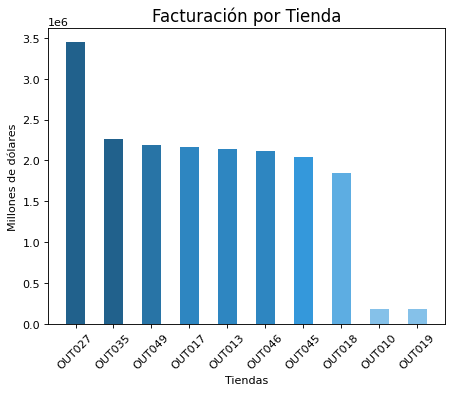

In [42]:
from matplotlib import pyplot as plt
fig1 = plt.figure(dpi=80)
# Grafico tiendas
ax1 =fig1.add_subplot(1,1,1)
ax1.bar(re1.index,re1['Ventas_prod'].values, width = 0.5, color=['#21618C','#21618C','#2874A6','#2E86C1','#2E86C1','#2E86C1','#3498DB','#5DADE2','#85C1E9','#85C1E9'])
plt.ylabel('Millones de dólares')
plt.xlabel('Tiendas')
plt.xticks(rotation=45)
plt.title('Facturación por Tienda', size=15)
plt.show()


In [43]:
re2 = df.groupby(['Tipo_Prod'])[['Ventas_prod']].sum().round(2)
re2 = re2.sort_values(by = 'Ventas_prod', ascending = False)
re2.head(3)

,Ventas_prod
Tipo_Prod,
Fruits and Vegetables,2820059.82
Snack Foods,2728351.86
Household,2055493.71


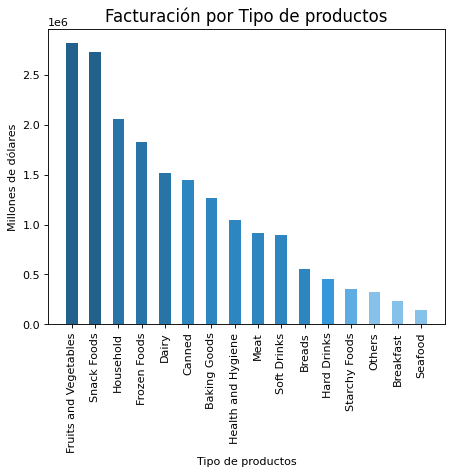

In [44]:
# Grafico de tipo de productos
plt.figure(dpi=80)
plt.bar(re2.index,re2['Ventas_prod'].values, width = 0.5,color=['#21618C','#21618C','#2874A6','#2874A6','#2874A6','#2E86C1','#2E86C1','#2E86C1','#2E86C1','#2E86C1','#2E86C1','#3498DB','#5DADE2','#85C1E9','#85C1E9','#85C1E9'])
plt.ylabel('Millones de dólares')
plt.xlabel('Tipo de productos')
plt.xticks(rotation=90)
plt.title('Facturación por Tipo de productos', size=15)
plt.show()

TOP 5 de los productos más vendidos en la tienda 'OUT027'


In [45]:
df2 = df[df['ID_Tienda']=='OUT027']
re2 = df2.groupby(['ID_Prod','Tipo_Prod'])[['Cant_Prod_Vend']].sum().round(2)
re2 = re2.sort_values(by = 'Cant_Prod_Vend', ascending = False)
re2.head()

,,Cant_Prod_Vend
ID_Prod,Tipo_Prod,
DRI39,Dairy,57.0
NCL30,Household,57.0
NCE42,Household,56.0
FDU09,Snack Foods,55.0
FDX37,Canned,51.0


TOP 5 de los productos menos vendidos en la tienda 'OUT027'

In [46]:
re2.tail()

,,Cant_Prod_Vend
ID_Prod,Tipo_Prod,
FDO28,Frozen Foods,4.0
FDT48,Baking Goods,4.0
FDX15,Meat,4.0
DRB01,Soft Drinks,3.0
NCU05,Health and Hygiene,3.0


Los productos 'Low Fat' son más vendidos en comparación a los 'Regular'.

In [47]:
re3 = df.groupby(['Cont_Grasa'])[['Ventas_prod']].sum().round(2)
re3

,Ventas_prod
Cont_Grasa,
Low Fat,11899660.30
Regular,6681886.91


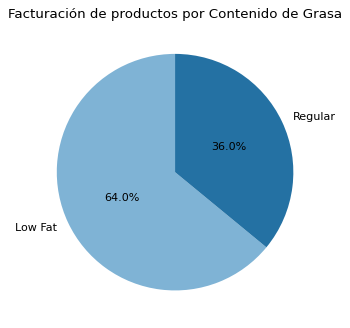

In [48]:
# Grafico pie
plt.figure(dpi=80)
plt.pie(re3['Ventas_prod'].values,labels = re3.index, autopct='%1.1f%%',pctdistance = 0.5, colors =['#7FB3D5','#2471A3'],startangle = 90)
plt.title('Facturación de productos por Contenido de Grasa', size=12)
plt.show()

Las tiendas pequeñas son las que generan mayor facturación.

In [49]:
re4 = df.groupby(['Tam_tienda'])[['Ventas_prod']].sum().round(2)
re4 = re4.sort_values(by = 'Ventas_prod', ascending = False)
re4.head(3)

,Ventas_prod
Tam_tienda,
Small,8958622.63
Medium,7480261.00
High,2142663.58


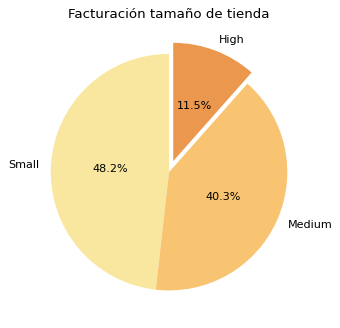

In [50]:
# Grafico pie2
explode = (0,0,0.1)
plt.figure(dpi=80)
plt.pie(re4['Ventas_prod'].values,explode=explode,labels = re4.index, autopct='%1.1f%%',pctdistance = 0.5, colors =['#F9E79F','#F8C471','#EB984E'],startangle = 90)
plt.title('Facturación tamaño de tienda', size=12)
plt.show()

TOP 5 de los productos más vendidos en tiendas pequeñas.

In [51]:
df3 = df[df['Tam_tienda']=='Small']
re5 = df3.groupby(['Tipo_Prod'])[['Cant_Prod_Vend']].sum().round(2)
re5 = re5.sort_values(by = 'Cant_Prod_Vend', ascending = False)
re5.head()

,Cant_Prod_Vend
Tipo_Prod,
Snack Foods,8881.0
Fruits and Vegetables,8866.0
Household,6572.0
Frozen Foods,6473.0
Canned,5253.0


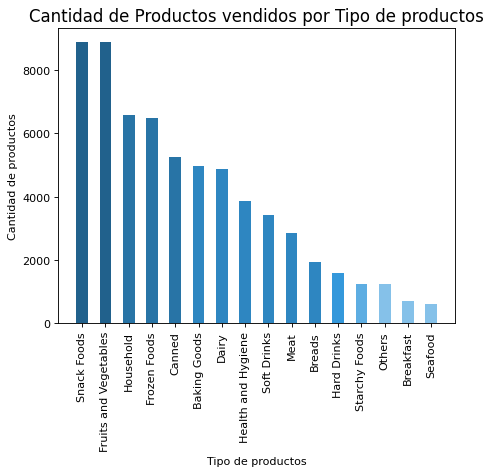

In [52]:
# Grafico de tipo de productos
plt.figure(dpi=80)
plt.bar(re5.index,re5['Cant_Prod_Vend'].values, width = 0.5, color=['#21618C','#21618C','#2874A6','#2874A6','#2874A6','#2E86C1','#2E86C1','#2E86C1','#2E86C1','#2E86C1','#2E86C1','#3498DB','#5DADE2','#85C1E9','#85C1E9','#85C1E9'])
plt.ylabel('Cantidad de productos')
plt.xlabel('Tipo de productos')
plt.xticks(rotation=90)
plt.title('Cantidad de Productos vendidos por Tipo de productos', size=15)
plt.show()

In [53]:
df4 = df[(df['Tam_tienda']=='Small')&(df['Tipo_Prod']=='Snack Foods')].sort_values(by='Cant_Prod_Vend')

In [54]:
re6 = df3.groupby(['Tipo_Prod'])[['%visual_tienda']].mean().round(2)
re6.head()

,%visual_tienda
Tipo_Prod,
Baking Goods,0.08
Breads,0.07
Breakfast,0.10
Canned,0.07
Dairy,0.08


In [68]:
re7 = df3.groupby(['Tipo_Prod'])[['Ventas_prod']].sum().round(2)
re7.head()

,Ventas_prod
Tipo_Prod,
Baking Goods,631188.39
Breads,275604.58
Breakfast,101800.15
Canned,744448.96
Dairy,732210.89


In [69]:
re7['Ventas_prod'] = re7['Ventas_prod']/5000000
re7

,Ventas_prod
Tipo_Prod,
Baking Goods,0.126238
Breads,0.055121
Breakfast,0.020360
Canned,0.148890
Dairy,0.146442
Frozen Foods,0.181257
Fruits and Vegetables,0.260784
Hard Drinks,0.042420
Health and Hygiene,0.101058


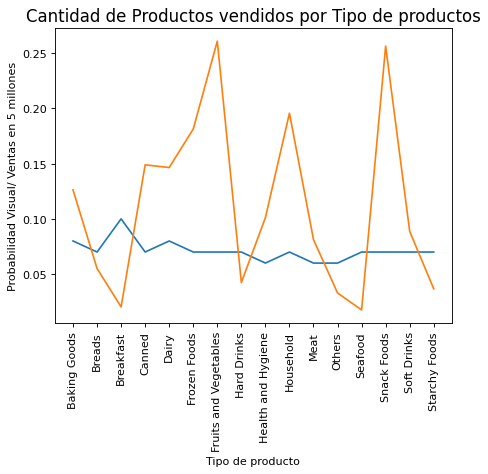

In [72]:
# Grafico de línea
plt.figure(dpi=80)
plt.plot(re6.index, re6['%visual_tienda'].values)
plt.plot(re7.index, re7['Ventas_prod'].values)
plt.ylabel('Probabilidad Visual/ Ventas en 5 millones')
plt.xlabel('Tipo de producto')
plt.xticks(rotation=90)
plt.title('Cantidad de Productos vendidos por Tipo de productos', size=15)
plt.show()

Tener mayor probabilidad visual no implica generar mayores ventas como en el caso de Breakfast y Fruits and Vegetables.

<ipython-input-78-f97597ba7322>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['Peso_Prod'],x=df['Tipo_Prod'],palette='Set3')


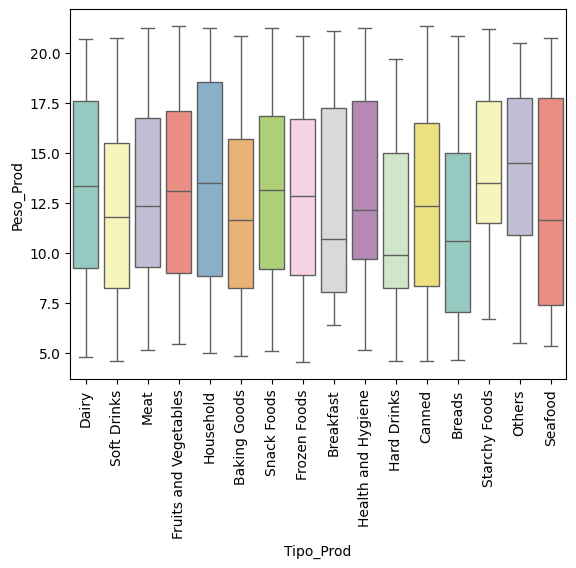

In [78]:
import seaborn as sns
sns.boxplot(y=df['Peso_Prod'],x=df['Tipo_Prod'],palette='Set3')
plt.xticks(rotation=90)
plt.show()